In [ ]:
!pip install requests pandas matplotlib

import requests
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import timeit

### Extracting weather data from the API(api.open-meteo.com) and returning the data in json format

In [2]:
def fetch_weather_data(latitude,longitude):
    # Fetching the data using open meteo API
    base_url = "https://api.open-meteo.com/v1/forecast"
    parameters = {
        "latitude":latitude,
        "longitude":longitude,
        "hourly":["temperature_2m","relative_humidity_2m"],
    }
    response = requests.get(base_url,params=parameters)
    return response.json()
# data = fetch_weather_data(40.7143,-74.006)
# data

In [3]:
def analyze_and_visualize_forecast(data, city_name):
    if data:
        # Extracting forecast dates and temperatures
        forecast_dates = data['hourly']['time']
        temperatures = data['hourly']['temperature_2m']

        # Converting date strings to datetime objects
        dates = [datetime.fromisoformat(date) for date in forecast_dates]

        # Visualization for Temperature Forecast
        plt.figure(figsize=(10, 5))
        plt.plot(dates[:24], temperatures[:24], marker='o', linestyle='-', label=city_name)
        plt.title(f'24-hour Temperature Forecast for {city_name}')
        plt.xlabel('Time')
        plt.ylabel('Temperature (°C)')
        plt.xticks(rotation=90)
        plt.legend()
        plt.tight_layout()
        plt.show()
    else:
        print(f"No data to analyze and visualize for {city_name}")
# data = fetch_weather_data(40.7143,-74.006)
# analyze_and_visualize_forecast(data ,"New york city")

In [4]:
def convert_to_dataframe(forecast_data):
    try:
        if 'hourly' in forecast_data:
            df = pd.json_normalize(forecast_data['hourly'])
        else:
            df = pd.DataFrame(forecast_data)
        display(df.head())
        return df
    except Exception as e:
        print(f"An error occurred while converting to DataFrame: {e}")
        return None

# convert_to_dataframe(data)
# analyze_and_visualize_forecast(data, 'New york city')

# **Task 1 : Implementing data cleaning**: <br>

Created a dataset with random missing values and generated random NaN values.<br>
Introduce  some errors by randomly selecting entries to replace with extreme values


In [5]:
def clean_temperature_data(data):
    cleaned_data = []
    if 'hourly' in data and isinstance(data['hourly'], list):
        for hour_data in data['hourly']:
            if temperature_value >= -273.15:
                cleaned_data.append({
                                    'time': hour_data['time'],
                                    'temperature_celsius': temperature_value
                              })
    return cleaned_data

# clean_temperature_data(data)


# **Task 2 :Enhance Visualization Function:** <br>
Extracted temperature and humidity for New York city and compared the Temperatue and humidity in a plot

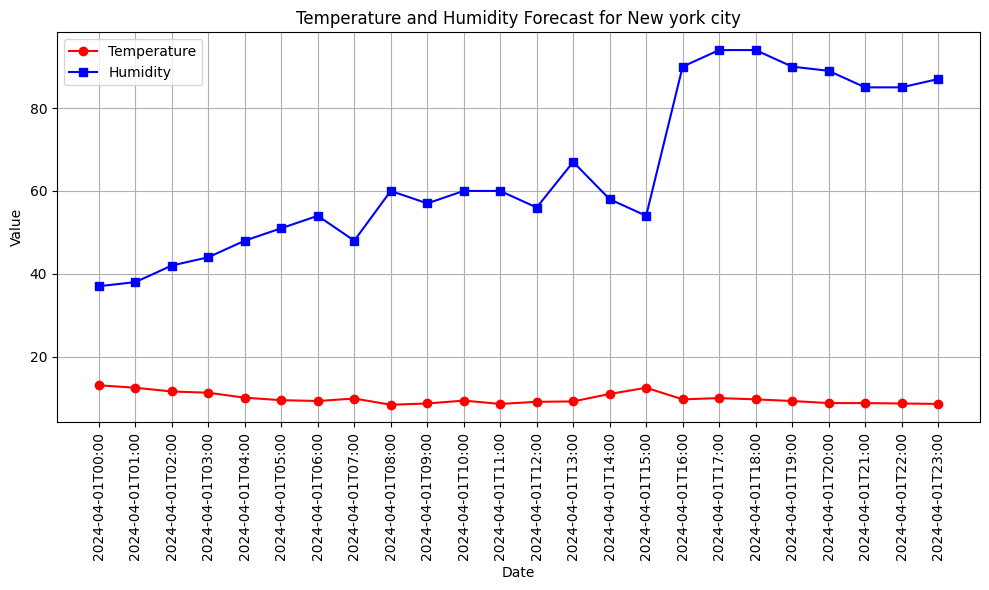

In [6]:
import matplotlib.pyplot as plt

def analyze_and_visualize_forecast(data, city_name):
    # Extracting temperature and humidity data for the past 24 hours
    dates = data['hourly']["time"][:24]
    temperature = data["hourly"]['temperature_2m'][:24]
    humidity = data["hourly"]["relative_humidity_2m"][:24]

    plt.figure(figsize=(10, 6))
    plt.plot(dates, temperature, color='red', marker='o', linestyle='-', label='Temperature')
    plt.plot(dates, humidity, color='blue', marker='s', linestyle='-', label='Humidity')
    plt.xlabel('Date')
    plt.ylabel('Value')
    plt.title(f'Temperature and Humidity Forecast for {city_name}')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
data = fetch_weather_data(40.7143,-74.006)
analyze_and_visualize_forecast(data ,"New york city")


## **Task 3 : Comparing Temperature between two cities:** <br>
Extracted temperature data for two cities and compared the temperature forecast for the past 24 hours in a plot

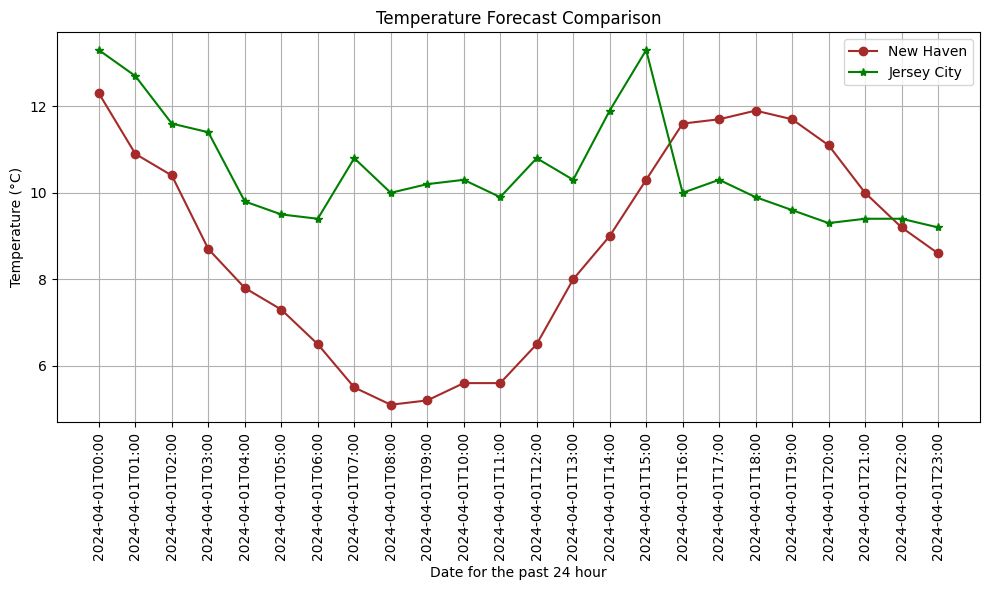

In [7]:
def compare_forecasts(data_city1, data_city2, city_name1, city_name2):
    # Extracting temperature data for both cities
    dates =  data_city1['hourly']['time'][:24]
    temperature_city1 = data_city1['hourly']['temperature_2m'][:24]
    temperature_city2 = data_city2['hourly']['temperature_2m'][:24]

    # Plot temperature forecasts for both cities
    plt.figure(figsize=(10, 6))
    plt.plot(dates, temperature_city1, color='brown', marker='o', linestyle='-', label=city_name1)
    plt.plot(dates, temperature_city2, color='green', marker='*', linestyle='-',  label=city_name2)
    plt.xlabel('Date for the past 24 hour')
    plt.ylabel('Temperature (°C)')
    plt.title('Temperature Forecast Comparison')
    plt.xticks(rotation=90)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
data_city1 = fetch_weather_data(41.4001, -72.9329)
data_city2 = fetch_weather_data(40.7282, -74.0776)
compare_forecasts(data_city1, data_city2, 'New Haven', 'Jersey City')

# **Task4: Aggregate data analysis function :**
Analyzed the temperature data and find  insights such as the best time of day for outdoor activities based on temperature and humidity

In [8]:
def find_best_outdoor_activity_time(data):
    # Defining min and max temperartures for a range  and also  humidity cutoff
    min_temp = 10
    max_temp = 35
    humidity_cutoff = 55
    best_time = []
    hourly_data = data['hourly']
    if 'temperature_2m' in hourly_data and 'relative_humidity_2m' in hourly_data:
        temperatures = hourly_data['temperature_2m']
        humidities = hourly_data['relative_humidity_2m']
        for i in range(len(temperatures)):
            temp = temperatures[i]
            hum = humidities[i]
            if min_temp <= temp <= max_temp and hum <= humidity_cutoff:
                best_time.append(hourly_data['time'][i])
    return best_time


data_1 = fetch_weather_data(41.4001, -72.9329)
find_best_outdoor_activity_time(data_1)
# print("Best time to go outside :", best_time)


['2024-04-01T00:00', '2024-04-01T01:00', '2024-04-01T02:00']

# **Task 5: Compute Weather Metrics** <br>
Created a function to calculate the average temperature and humidity from the weather DataFrame

In [9]:
def avg_weather_humidity(df_weather):
    # Calculate average temperature and humidity
    df_wea = pd.DataFrame(df_weather)
    average_temperature = round(df_wea['temperature_2m'].mean(),2)
    average_humidity = round(df_wea['relative_humidity_2m'].mean(),2)
    return average_temperature, average_humidity
# avg_weather_humidity(data["hourly"])

Data fetched for Los Angeles, CA in 0.5230 seconds.


,time,temperature_2m,relative_humidity_2m
0,2024-04-01T00:00,14.1,68
1,2024-04-01T01:00,14.0,64
2,2024-04-01T02:00,12.8,65
3,2024-04-01T03:00,12.5,62
4,2024-04-01T04:00,12.0,67


Average temperature and humidity of Los Angeles, CA:
(13.91, 55.83)
Best time to go outside :
['2024-04-01T22:00', '2024-04-01T23:00', '2024-04-02T00:00', '2024-04-02T01:00', '2024-04-02T21:00', '2024-04-02T22:00', '2024-04-02T23:00', '2024-04-03T00:00', '2024-04-03T01:00', '2024-04-03T15:00', '2024-04-03T16:00', '2024-04-03T17:00', '2024-04-03T18:00', '2024-04-03T19:00', '2024-04-03T20:00', '2024-04-03T21:00', '2024-04-03T22:00', '2024-04-03T23:00', '2024-04-04T00:00', '2024-04-04T01:00', '2024-04-04T02:00', '2024-04-04T03:00', '2024-04-04T04:00', '2024-04-04T18:00', '2024-04-04T19:00', '2024-04-04T20:00', '2024-04-04T21:00', '2024-04-04T22:00', '2024-04-04T23:00', '2024-04-05T00:00', '2024-04-05T01:00', '2024-04-05T02:00', '2024-04-05T03:00', '2024-04-05T04:00', '2024-04-05T05:00', '2024-04-05T17:00', '2024-04-05T18:00', '2024-04-05T19:00', '2024-04-05T20:00', '2024-04-05T21:00', '2024-04-05T22:00', '2024-04-05T23:00', '2024-04-06T00:00', '2024-04-06T01:00', '2024-04-06T02:00', '2024

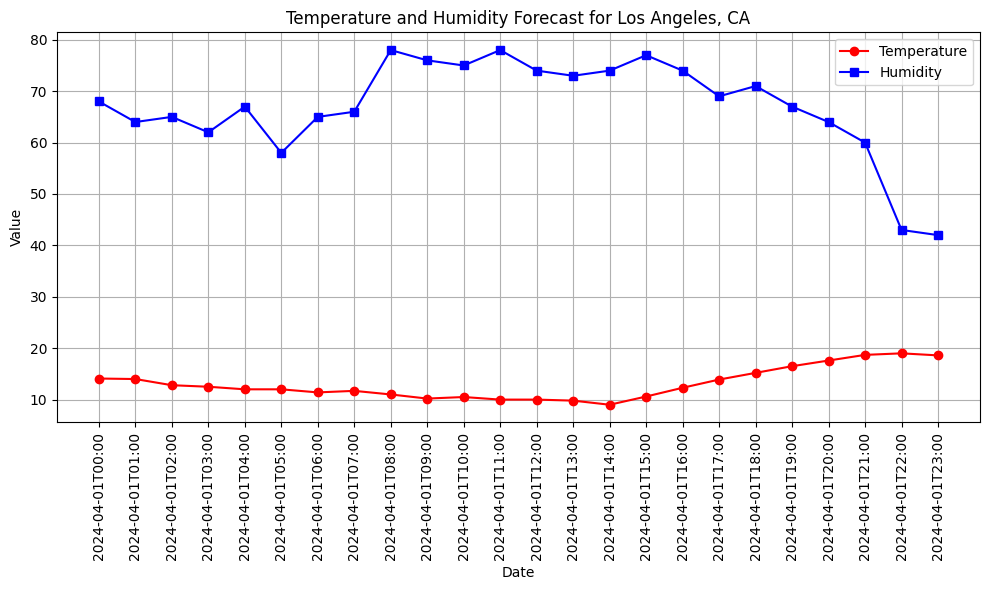

Data fetched for New haven ,CT in 0.5220 seconds.


,time,temperature_2m,relative_humidity_2m
0,2024-04-01T00:00,12.3,38
1,2024-04-01T01:00,10.9,48
2,2024-04-01T02:00,10.4,39
3,2024-04-01T03:00,8.7,53
4,2024-04-01T04:00,7.8,56


Average temperature and humidity of New haven ,CT:
(4.97, 80.41)
Best time to go outside :
['2024-04-01T00:00', '2024-04-01T01:00', '2024-04-01T02:00']
Analyzing and visualizing weather forecast for New haven ,CT...


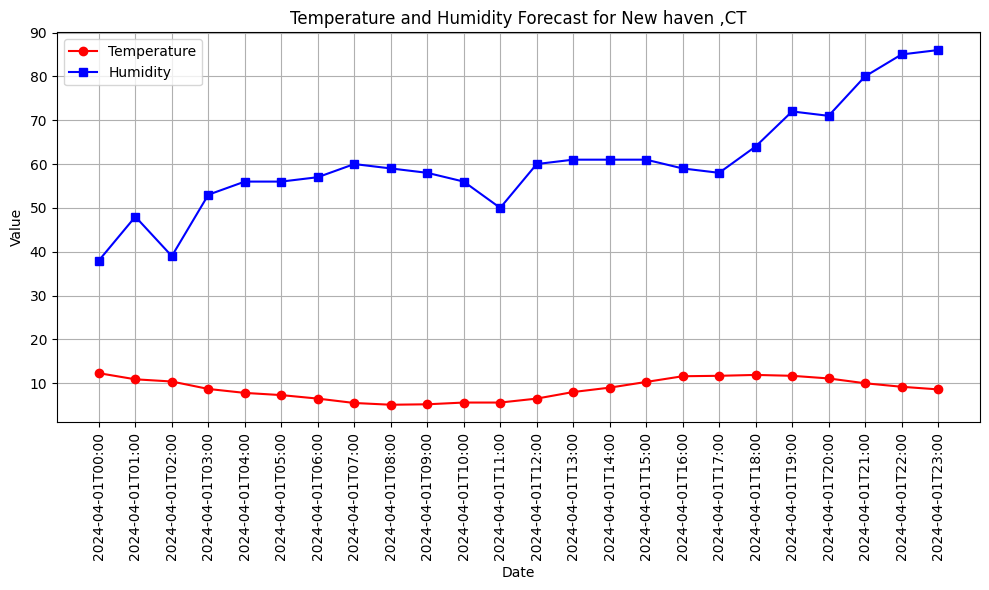

Total execution time: 2.0847 seconds.


In [10]:
def main():
    locations = {
        "Los Angeles, CA": {"latitude": 34.0522, "longitude": -118.2437},
        "New haven ,CT"  : {"latitude" : 41.4001,"longitude": -72.9329}
    }
    total_data = []
    for city, coords in locations.items():
        start_time = timeit.default_timer()  # Start timing
        forecast_data = fetch_weather_data(coords['latitude'], coords['longitude'])
        elapsed = timeit.default_timer() - start_time  # End timing
        print(f"Data fetched for {city} in {elapsed:.4f} seconds.")
        # print(f"Analyzing and visualizing weather forecast for {city}...")
        # analyze_and_visualize_forecast(forecast_data, city)

        if forecast_data:
            df = convert_to_dataframe(forecast_data["hourly"])
            if df is not None:
                print(f"Average temperature and humidity of {city}:" )
                print(avg_weather_humidity(df))
                total_data.append(df)
                print("Best time to go outside :")
                print(find_best_outdoor_activity_time(forecast_data))
                print(f"Analyzing and visualizing weather forecast for {city}...")
                analyze_and_visualize_forecast(forecast_data, city)

            else:
                print(f"Failed to convert forecast data into DataFrame for {city}")
        else:
            print(f"Failed to fetch data for {city}")
    # concatenated_df = pd.concat(total_data, ignore_index=True)
    # print("Concatenated DataFrame for all locations:")
    # print(concatenated_df)

if __name__ == "__main__":
    start_time = timeit.default_timer()  # Start timing
    main()
    elapsed = timeit.default_timer() - start_time  # End timing
    print(f"Total execution time: {elapsed:.4f} seconds.")